(60000, 28, 28)

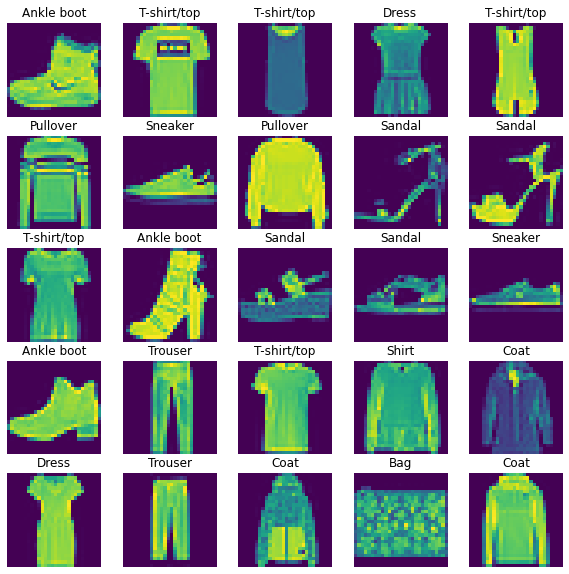

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0   
test_images = test_images / 255.0 

plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5,5,i + 1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i]])
    plt.axis("off")
    
train_images.shape

In [2]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(len(class_names))
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [3]:
# model.compile(optimizer='adam',
#               loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['val_sparse_categorical_accuracy'])

model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

hist = model.fit(train_images, 
                 train_labels, 
                 epochs=20,
                 validation_split=0.2,
                 verbose=1)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5200 - sparse_categorical_accuracy: 0.8170 - val_loss: 0.4450 - val_sparse_categorical_accuracy: 0.8423
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3881 - sparse_categorical_accuracy: 0.8598 - val_loss: 0.3659 - val_sparse_categorical_accuracy: 0.8696
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3459 - sparse_categorical_accuracy: 0.8734 - val_loss: 0.3392 - val_sparse_categorical_accuracy: 0.8787
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3202 - sparse_categorical_accuracy: 0.8824 - val_loss: 0.3338 - val_sparse_categorical_accuracy: 0.8814
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3019 - sparse_categorical_accuracy: 0.8884 - val_loss: 0.3402 - val_sparse_categorical_accuracy: 0.8790
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2855 - spars

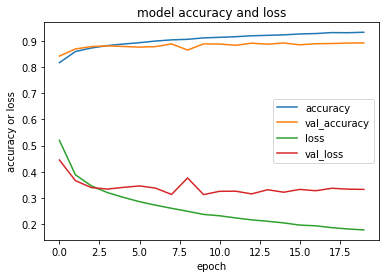

In [4]:
plt.plot(hist.history['sparse_categorical_accuracy'], label = 'accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], label = 'val_accuracy')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.title('model accuracy and loss')
plt.ylabel('accuracy or loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [5]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", round(score[0],2))
print("Test accuracy:", round(score[1],2))

# model.save('fashion_mnist_model.h5')

Test loss: 0.37
Test accuracy: 0.89


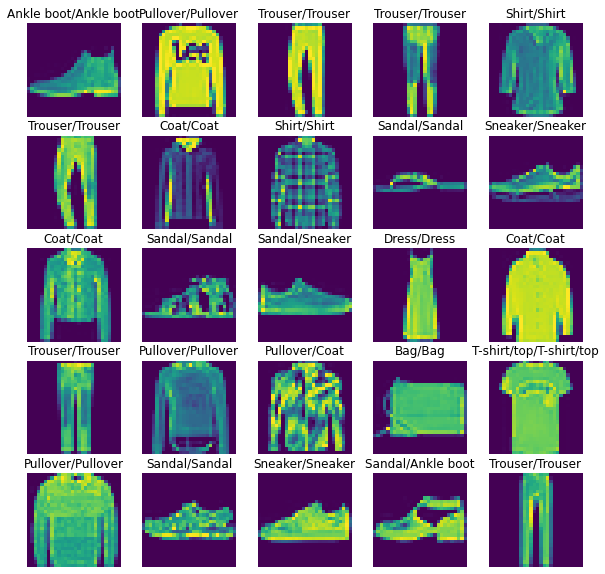

In [6]:
import numpy as np

# model = keras.models.load_model('fashion_mnist_model.h5')
predictions = model.predict(test_images)

plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(class_names[np.argmax(predictions[i])]+'/'+class_names[test_labels[i]])
    plt.axis("off")
    
# 89%